In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans

df = pd.read_csv('ZipData_CLEANED.csv')

## K-Means clustering of COVID-19 total cases

find optimal k

In [3]:
cases = df['TotalCases']

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cases.to_numpy().reshape(-1,1))
    Sum_of_squared_distances.append(km.inertia_)

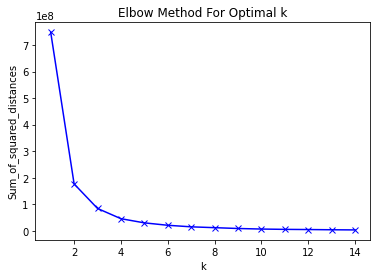

In [4]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

the elbow is at 3, so 3 clusters is optimal

In [5]:
model = KMeans(n_clusters=3)
model.fit(cases.to_numpy().reshape(-1,1))
model.labels_

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0,
       2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,

## Convert from numeric to string literal labels to avoid bias

In [6]:
labels = []

for x in model.labels_:
    if x == 0:
        labels.append('Cluster0')
    elif x == 1:
        labels.append('Cluster1')
    elif x == 2:
        labels.append('Cluster2')
        
df['Class'] = labels

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,Zip Code,AREALAND,AREAWATR,Pop2010_x,HU100,NHW,NHB,NHAI,NHA,NHNH,...,PCTPOP65,MEDAGE,VACNS,PVACNS,PHOWN,PWOMORT,PRENT,PLT18SP,TotalCases,Class
0,20601,115635266.0,387684.0,24156.0,8722.0,9785.0,11146.0,155.0,880.0,11.0,...,8.0,37.3,376.0,4.3,71.1,11.2,19.9,30.4,1796.0,Cluster2
1,20602,35830723.0,352762.0,24955.0,9736.0,8466.0,13054.0,116.0,731.0,15.0,...,7.9,32.6,769.0,7.9,59.7,9.0,34.4,43.6,1985.0,Cluster2
2,20603,44239637.0,219356.0,28967.0,10317.0,9625.0,15025.0,98.0,1446.0,24.0,...,4.8,34.5,531.0,5.1,73.8,4.7,22.6,29.9,2104.0,Cluster2
3,20606,7501011.0,1248760.0,431.0,230.0,377.0,45.0,1.0,4.0,0.0,...,25.1,49.1,15.0,6.5,49.7,39.3,18.1,31.2,12.0,Cluster1
4,20607,54357590.0,448221.0,9802.0,3504.0,2165.0,6321.0,33.0,560.0,3.0,...,8.6,40.9,172.0,4.9,83.1,10.3,7.4,22.1,853.0,Cluster1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,21917,20265281.0,146369.0,2520.0,907.0,2387.0,30.0,2.0,17.0,1.0,...,12.3,42.0,39.0,4.3,68.2,22.1,12.5,16.7,134.0,Cluster1
445,21918,45741330.0,6628177.0,4284.0,1589.0,4096.0,55.0,6.0,30.0,2.0,...,11.2,41.2,69.0,4.3,61.1,30.0,12.8,24.2,208.0,Cluster1
446,21919,112736603.0,22553121.0,3467.0,2179.0,3321.0,43.0,14.0,8.0,0.0,...,19.5,47.1,84.0,3.9,52.7,39.5,12.9,21.7,143.0,Cluster1
447,21921,244939298.0,14098236.0,44471.0,17232.0,36707.0,3953.0,98.0,673.0,20.0,...,10.8,36.7,892.0,5.2,51.9,24.5,31.3,34.5,2875.0,Cluster2


In [8]:
#df.corr()

 ## Partition data into training and testing sets

Using Pop2010_x, PNHW (pct non-hispanic white), PNHB (pct non-hispanic black), PNHAI, PNHA, PNHNH, PNHO, PNHT, PHISP, PCTPOP65 (pct population over 65), PLT18SP (pct pop under 18) to predict Class

Use the holdout method to create training data (70% random sample) and testing data (30% random sample)

In [9]:
df = df[['Pop2010_x','PNHW','PNHB','PNHAI','PNHA','PNHNH','PNHO','PNHT','PHISP','PCTPOP65','PLT18SP','TotalCases','Class']]
df

,Pop2010_x,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,PCTPOP65,PLT18SP,TotalCases,Class
0,24156.0,40.5,46.1,0.6,3.6,0.0,0.2,3.5,5.3,8.0,30.4,1796.0,Cluster2
1,24955.0,33.9,52.3,0.5,2.9,0.1,0.2,4.0,6.1,7.9,43.6,1985.0,Cluster2
2,28967.0,33.2,51.9,0.3,5.0,0.1,0.2,3.8,5.5,4.8,29.9,2104.0,Cluster2
3,431.0,87.5,10.4,0.2,0.9,0.0,0.0,0.0,0.9,25.1,31.2,12.0,Cluster1
4,9802.0,22.1,64.5,0.3,5.7,0.0,0.1,2.4,4.9,8.6,22.1,853.0,Cluster1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,2520.0,94.7,1.2,0.1,0.7,0.0,0.3,1.5,1.5,12.3,16.7,134.0,Cluster1
445,4284.0,95.6,1.3,0.1,0.7,0.0,0.1,1.1,1.1,11.2,24.2,208.0,Cluster1
446,3467.0,95.8,1.2,0.4,0.2,0.0,0.1,1.1,1.2,19.5,21.7,143.0,Cluster1
447,44471.0,82.5,8.9,0.2,1.5,0.0,0.1,2.2,4.5,10.8,34.5,2875.0,Cluster2


In [10]:
train=df.sample(frac=0.7,random_state=1234)
test=df.drop(train.index)

In [11]:
obs = ['Pop2010_x','PNHW','PNHB','PNHAI','PNHA','PNHNH','PNHO','PNHT','PHISP','PCTPOP65','PLT18SP']
cls = ['Class']

trainObs = train[obs].to_numpy()
trainCls = train[cls].to_numpy().ravel()
testObs = test[obs].to_numpy()
testCls = test[cls].to_numpy().ravel()

## t-test for means of partitions

In [12]:
print('2010 Population: ')
print(stats.ttest_ind(train['Pop2010_x'],test['Pop2010_x'],equal_var=False))
print('\n')
print('PNHW: ')
print(stats.ttest_ind(train['PNHW'],test['PNHW'],equal_var=False))
print('\n')
print('PNHB: ')
print(stats.ttest_ind(train['PNHB'],test['PNHB'],equal_var=False))
print('\n')
print('PNHAI: ')
print(stats.ttest_ind(train['PNHAI'],test['PNHAI'],equal_var=False))
print('\n')
print('PNHA: ')
print(stats.ttest_ind(train['PNHA'],test['PNHA'],equal_var=False))
print('\n')
print('PNHNH: ')
print(stats.ttest_ind(train['PNHNH'],test['PNHNH'],equal_var=False))
print('\n')
print('PNHO: ')
print(stats.ttest_ind(train['PNHO'],test['PNHO'],equal_var=False))
print('\n')
print('PNHT: ')
print(stats.ttest_ind(train['PNHT'],test['PNHT'],equal_var=False))
print('\n')
print('PHISP: ')
print(stats.ttest_ind(train['PHISP'],test['PHISP'],equal_var=False))
print('\n')
print('Percent Pop. Over 65: ')
print(stats.ttest_ind(train['PCTPOP65'],test['PCTPOP65'],equal_var=False))
print('\n')
print('Percent Pop. Under 18: ')
print(stats.ttest_ind(train['PLT18SP'],test['PLT18SP'],equal_var=False))
print('\n')

2010 Population: 
Ttest_indResult(statistic=-1.853217272401932, pvalue=0.0651557964148649)


PNHW: 
Ttest_indResult(statistic=1.7238827658232274, pvalue=0.08611069730242685)


PNHB: 
Ttest_indResult(statistic=-2.016554777563186, pvalue=0.045014727440915094)


PNHAI: 
Ttest_indResult(statistic=0.6812281645849746, pvalue=0.49626035510299804)


PNHA: 
Ttest_indResult(statistic=-0.0833336048195187, pvalue=0.933650689957071)


PNHNH: 
Ttest_indResult(statistic=-0.4459349595141604, pvalue=0.656053147536432)


PNHO: 
Ttest_indResult(statistic=-1.529835610795957, pvalue=0.1275647975196771)


PNHT: 
Ttest_indResult(statistic=-1.1352662810263683, pvalue=0.25749081523477363)


PHISP: 
Ttest_indResult(statistic=-0.623454211792434, pvalue=0.5335658747355307)


Percent Pop. Over 65: 
Ttest_indResult(statistic=-0.20142455911900428, pvalue=0.8405449043379185)


Percent Pop. Under 18: 
Ttest_indResult(statistic=-2.522053181154521, pvalue=0.012353619228948733)




Using p = .05, we cannot reject the null hypothesis for all properties except Percent Pop. Under 18

## Decision Tree Classifier

without entropy

In [13]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier()
clf = clf.fit(trainObs, trainCls)

dt_pred = clf.predict(testObs)

print(metrics.classification_report(testCls, dt_pred))

              precision    recall  f1-score   support

    Cluster0       0.79      0.92      0.85        12
    Cluster1       0.96      1.00      0.98        87
    Cluster2       0.97      0.81      0.88        36

    accuracy                           0.94       135
   macro avg       0.90      0.91      0.90       135
weighted avg       0.94      0.94      0.94       135



In [14]:
tree.export_graphviz(clf, out_file='tree.dot', feature_names=['Pop2010_x','PNHW','PNHB','PNHAI','PNHA','PNHNH','PNHO','PNHT','PHISP','PCTPOP65','PLT18SP'],  
                         class_names=['Cluster0','Cluster1','Cluster2'])  

with entropy

In [15]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(trainObs, trainCls)

dt_pred = clf.predict(testObs)

print(metrics.classification_report(testCls, dt_pred))

              precision    recall  f1-score   support

    Cluster0       0.75      1.00      0.86        12
    Cluster1       0.98      1.00      0.99        87
    Cluster2       1.00      0.83      0.91        36

    accuracy                           0.96       135
   macro avg       0.91      0.94      0.92       135
weighted avg       0.96      0.96      0.96       135



In [16]:
tree.export_graphviz(clf, out_file='tree_entropy.dot', feature_names=['Pop2010_x','PNHW','PNHB','PNHAI','PNHA','PNHNH','PNHO','PNHT','PHISP','PCTPOP65','PLT18SP'],  
                         class_names=['Cluster0','Cluster1','Cluster2'])  

In [ ]:
import graphviz
from graphviz import Source
s1 = Source.from_file('tree.dot')
s2 = Source.from_file('bean_tree_entropy.dot')
#s1.view()
#s2.view()

# K-Nearest Neighbors Classifier

## find optimal k

In [14]:
from sklearn.neighbors import KNeighborsClassifier

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(trainObs, trainCls)
    pred_i = knn.predict(testObs)
    error.append(np.mean(pred_i != testCls))

Text(0, 0.5, 'Mean Error')

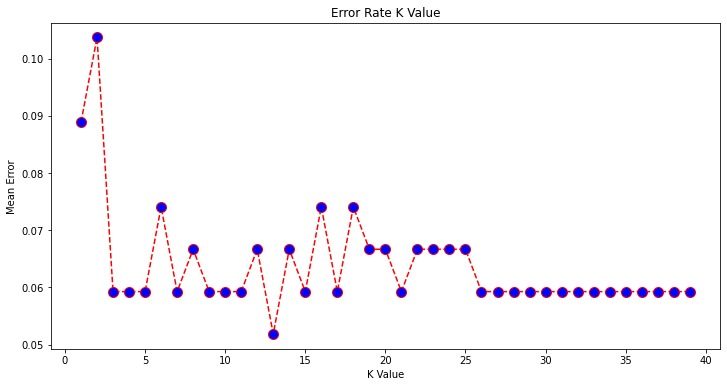

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

k = 13 seems best, minimizing mean error

In [16]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn.fit(trainObs, trainCls)
knn_pred = knn.predict(testObs)

from __future__ import division
(sum(testCls==knn_pred))/len(knn_pred)

0.9407407407407408

confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix
knn_tab = confusion_matrix(testCls, knn_pred, labels=(['Cluster0','Cluster1','Cluster2']))
knn_tab

array([[87,  0,  0],
       [ 2, 31,  3],
       [ 0,  3,  9]], dtype=int64)

classification metrics report

In [18]:
from sklearn import metrics
print(metrics.classification_report(testCls, knn_pred))

              precision    recall  f1-score   support

    Cluster0       0.98      1.00      0.99        87
    Cluster1       0.91      0.86      0.89        36
    Cluster2       0.75      0.75      0.75        12

    accuracy                           0.94       135
   macro avg       0.88      0.87      0.87       135
weighted avg       0.94      0.94      0.94       135



## Naive Bayes Classifier

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(trainObs, trainCls)

In [20]:
nb_pred = gnb.predict(testObs)

print(metrics.classification_report(testCls, nb_pred))

              precision    recall  f1-score   support

    Cluster0       0.96      0.93      0.95        87
    Cluster1       0.80      0.78      0.79        36
    Cluster2       0.69      0.92      0.79        12

    accuracy                           0.89       135
   macro avg       0.82      0.88      0.84       135
weighted avg       0.90      0.89      0.89       135



# Random Forest Classifier

10 estimators (trees)

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(trainObs, trainCls)

In [22]:
rf_pred = clf.predict(testObs)

print(metrics.classification_report(testCls, rf_pred))

              precision    recall  f1-score   support

    Cluster0       0.95      1.00      0.97        87
    Cluster1       0.88      0.83      0.86        36
    Cluster2       0.89      0.67      0.76        12

    accuracy                           0.93       135
   macro avg       0.91      0.83      0.86       135
weighted avg       0.92      0.93      0.92       135



## 100 trees

In [23]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(trainObs, trainCls)

rf_pred = clf.predict(testObs)

print(metrics.classification_report(testCls, rf_pred))

              precision    recall  f1-score   support

    Cluster0       0.95      1.00      0.97        87
    Cluster1       0.94      0.83      0.88        36
    Cluster2       0.91      0.83      0.87        12

    accuracy                           0.94       135
   macro avg       0.93      0.89      0.91       135
weighted avg       0.94      0.94      0.94       135



## 1000 trees

In [24]:
clf = RandomForestClassifier(n_estimators=1000)
clf = clf.fit(trainObs, trainCls)

rf_pred = clf.predict(testObs)

print(metrics.classification_report(testCls, rf_pred))

              precision    recall  f1-score   support

    Cluster0       0.96      1.00      0.98        87
    Cluster1       0.94      0.86      0.90        36
    Cluster2       0.91      0.83      0.87        12

    accuracy                           0.95       135
   macro avg       0.93      0.90      0.92       135
weighted avg       0.95      0.95      0.95       135

